In [1]:
import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

In [2]:
path = "TLB_logs/"
files = ["tlb_all_ucr_16_8-28-02-24.csv",
         "tlb_all_ucr_8_8-28-02-24.csv",
         "tlb_all_ucr_4_8-28-02-24.csv"]

configs = ["16-8", "8-8", "4-8"]
df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)
    
    mapping = {"sfa_equi-depth_False": "SFA Equi-Depth", # + str(configs[i]),
               "sfa_equi-depth_True": "SFA Equi-Depth +Variance", # + str(configs[i]),
               "sfa_equi-width_False": "SFA Equi-Width", # + str(configs[i]),
               "sfa_equi-width_True": "SFA Equi-Width +Variance", # + str(configs[i]),
               "isax": "iSAX",
               }
    
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.009773,16-8
1,iSAX,ArrowHead,0.028558,16-8
2,iSAX,ArrowHead,0.046220,16-8
3,iSAX,ArrowHead,0.060400,16-8
4,iSAX,ArrowHead,0.077864,16-8
...,...,...,...,...
190475,SFA Equi-Depth,Yoga,0.588712,4-8
190476,SFA Equi-Depth,Yoga,0.590960,4-8
190477,SFA Equi-Depth,Yoga,0.592544,4-8
190478,SFA Equi-Depth,Yoga,0.595517,4-8


In [3]:
df[["Method", "TLB", "Config"]] \
        .groupby(["Method", "Config"]).median() \
        .sort_values(by=["Config", "TLB"], ascending=False)

,,TLB
Method,Config,
SFA Equi-Depth +Variance,8-8,0.222195
SFA Equi-Width +Variance,8-8,0.210707
SFA Equi-Depth,8-8,0.206480
SFA Equi-Width,8-8,0.192804
iSAX,8-8,0.145922
SFA Equi-Depth +Variance,4-8,0.175855
SFA Equi-Width +Variance,4-8,0.165385
SFA Equi-Depth,4-8,0.151782
SFA Equi-Width,4-8,0.141548


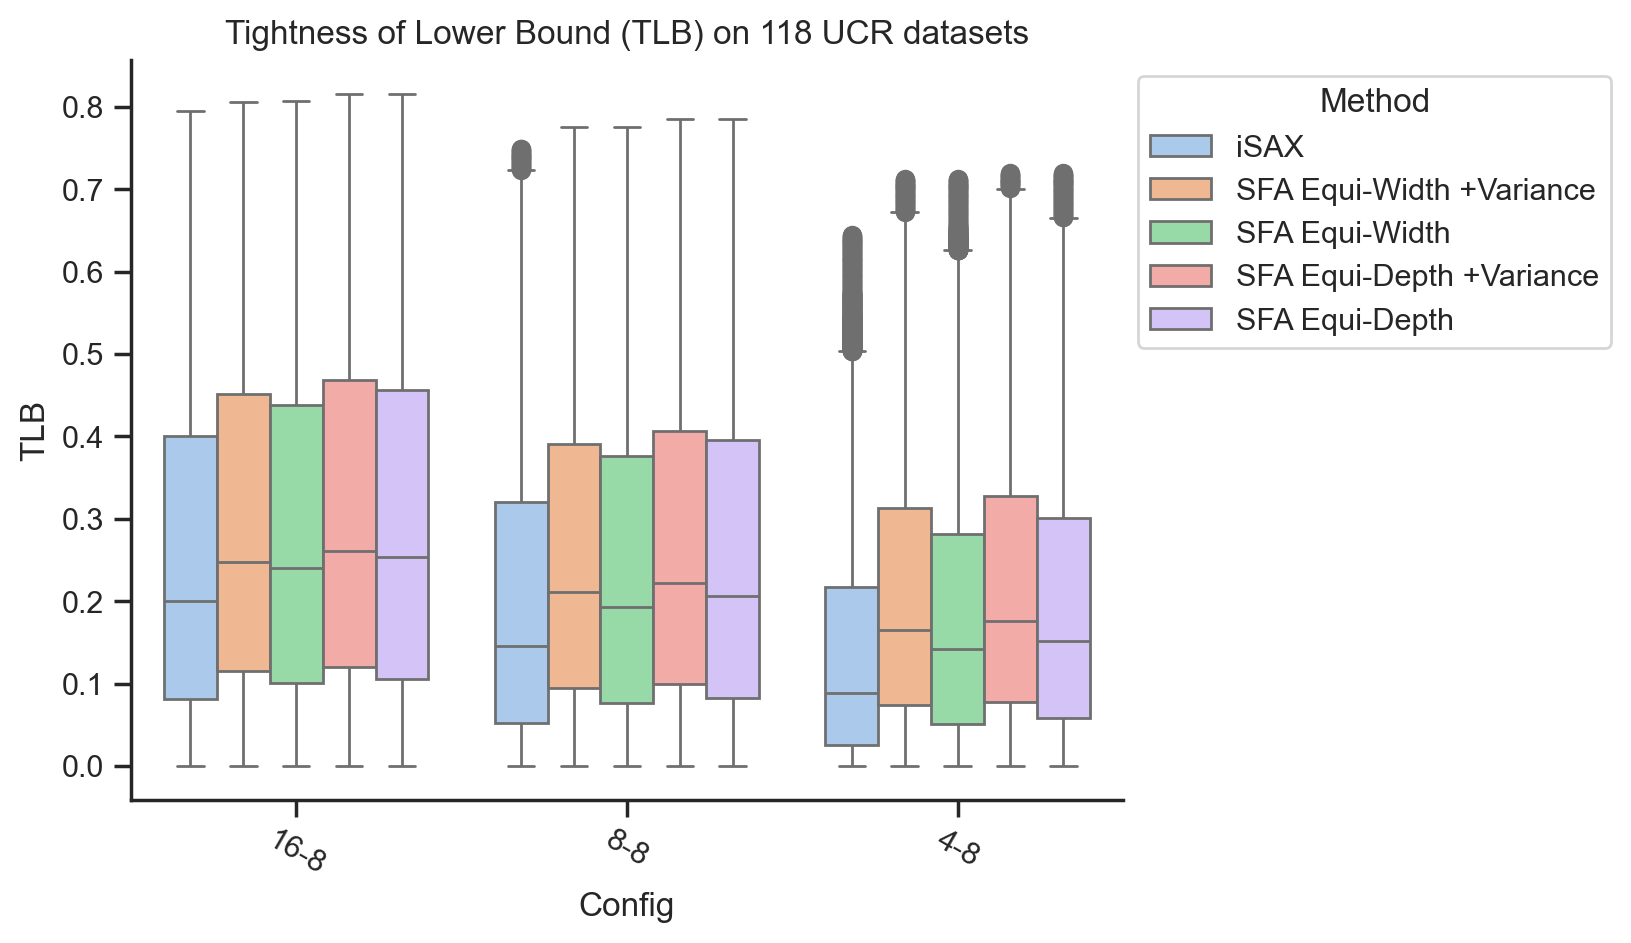

In [4]:
sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot(
    x="Config", y="TLB", hue="Method", data=df,
    #order=df[["Config", "Method", "TLB"]] \
    #    .groupby(["Config", "Method"]).median() \
    #    .sort_values(by=["Config", "TLB"], ascending=False).reset_index().index
    )
ax.set_title("Tightness of Lower Bound (TLB) on 118 UCR datasets")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()
#plt.tight_layout()
plt.savefig("images/boxplot.pdf", bbox_inches='tight')

In [5]:
df[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).median() \
        .sort_values(by=["Config", "TLB"], ascending=False).reset_index()[["Config", "Method"]]

,Config,Method
0,8-8,SFA Equi-Depth +Variance
1,8-8,SFA Equi-Width +Variance
2,8-8,SFA Equi-Depth
3,8-8,SFA Equi-Width
4,8-8,iSAX
5,4-8,SFA Equi-Depth +Variance
6,4-8,SFA Equi-Width +Variance
7,4-8,SFA Equi-Depth
8,4-8,SFA Equi-Width
9,4-8,iSAX
